In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from mplsoccer.pitch import Pitch
%matplotlib inline  
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
#importing all the needed libraries
from adjustText import adjust_text
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.patches as patches

In [2]:
x=np.random.randint(1,100,40)

In [3]:
y=np.random.randint(1,100,40)

In [4]:
x

array([94, 64, 37, 61, 15, 38, 92, 74, 63, 54, 88, 72, 71, 91, 22, 82, 89,
       39, 11, 53, 55, 51, 28, 70, 38,  1, 82,  4,  2, 11, 92, 55, 99, 14,
       71, 36, 96, 98, 59, 75])

In [5]:
y

array([54, 42, 24, 99, 34, 19, 90, 38, 75, 63, 86, 86, 83, 33, 27, 11, 68,
       52, 51, 96, 23, 78, 32, 68, 93, 97, 31, 48, 93, 77, 23, 84, 13,  4,
       99, 12, 11, 89, 93, 86])

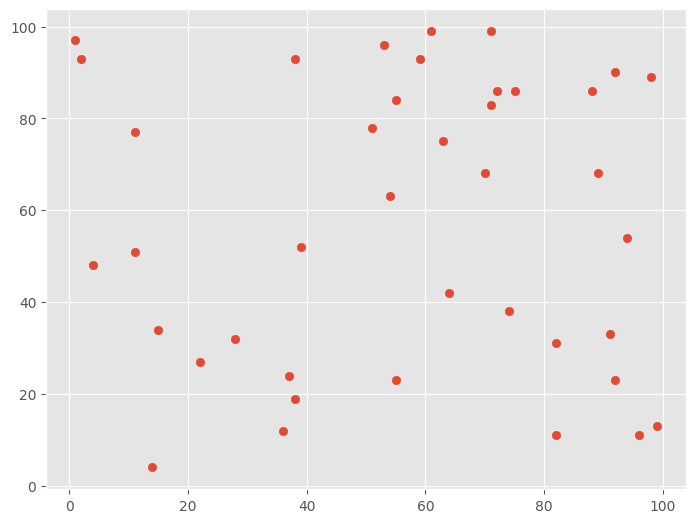

In [6]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(x,y)

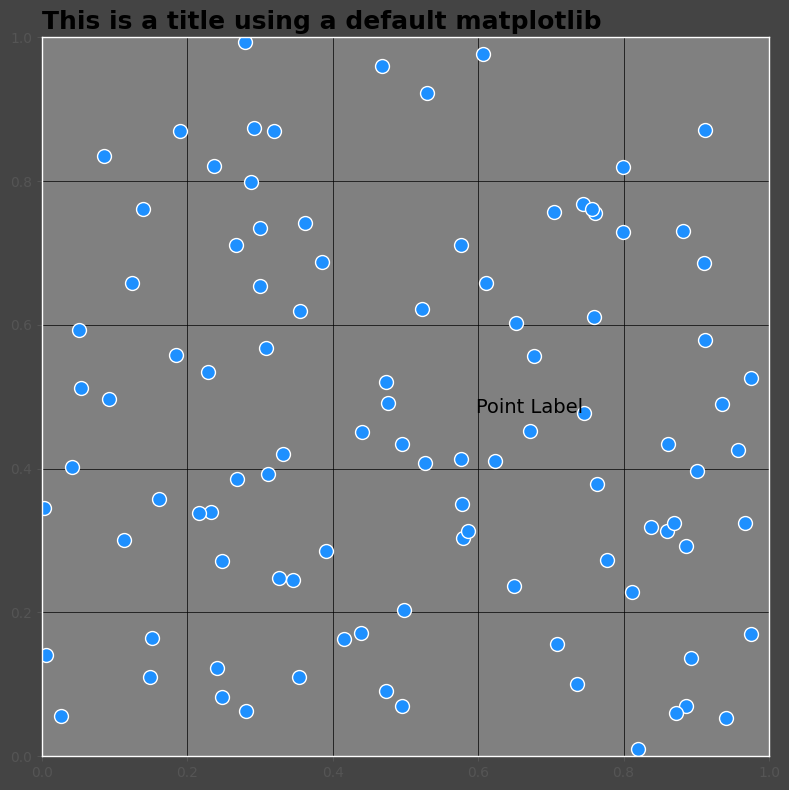

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
np.random.seed(402)
fig.set_facecolor("#444444")
ax.patch.set_facecolor("grey")
x = np.random.uniform(0,1,100)
y = np.random.uniform(0,1,100)
ax.set_title("This is a title using a default matplotlib", loc="left", fontweight="bold", fontsize=18) 
ax.grid(lw=0.5, color="k", zorder=1)
ax.scatter(x,y, color="dodgerblue", edgecolors="w", linewidths=1, s=100, zorder=2) 
ax.text(x[19],y[19]+0.025, "Point Label", ha="center", color="k", fontsize=14) 
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.tight_layout() 
plt.show()
                                                                                        

In [102]:
import asyncio
import json

import aiohttp

from understat import Understat
import nest_asyncio
nest_asyncio.apply()

In [109]:
async with aiohttp.ClientSession() as session:
    understat = Understat(session)
    players = await understat.get_league_players(
            "La Liga",
            2014)
    a=json.dumps(players)
    b=json.loads(a)
loop = asyncio.get_event_loop()

In [110]:
df=pd.json_normalize(b)

In [111]:
df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,2371,Cristiano Ronaldo,35,3103,48,39.30874598119408,16,13.600629400461912,225,76,5,1,F M,Real Madrid,38,30.38968110177666,43.60805014614016,7.520235439762473
1,2097,Lionel Messi,38,3374,43,35.89176997169852,18,17.61194877512753,187,95,4,0,F S,Barcelona,38,31.432101871818304,54.75358371436596,19.756728649139404
2,2099,Neymar,33,2573,22,22.72161516547203,7,8.261538552120328,95,52,6,0,F S,Barcelona,21,21.978335231542587,36.88821509107947,11.678398191928864
3,2270,Antoine Griezmann,37,2490,22,14.709659114480019,1,2.6077212067320943,78,23,6,0,F M S,Atletico Madrid,22,14.709659114480019,18.479457587003708,4.551564801484346
4,1125,Carlos Bacca,37,2581,20,19.27924784179777,6,4.728215850889683,69,31,4,0,F S,Sevilla,14,13.33366437535733,16.08634595107287,2.6682418268173933


In [112]:
df["time"]=df["time"].apply(lambda x:int(x))

In [113]:
df=df[df["time"]>2000][["player_name","xG","xA"]]

In [114]:
df["xG"]=df["xG"].apply(lambda x:float(x))

In [115]:
df["xA"]=df["xA"].apply(lambda x:float(x))

/home/sai/Documents/stablenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sai/Documents/stablenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='xA', ylabel='xG'>

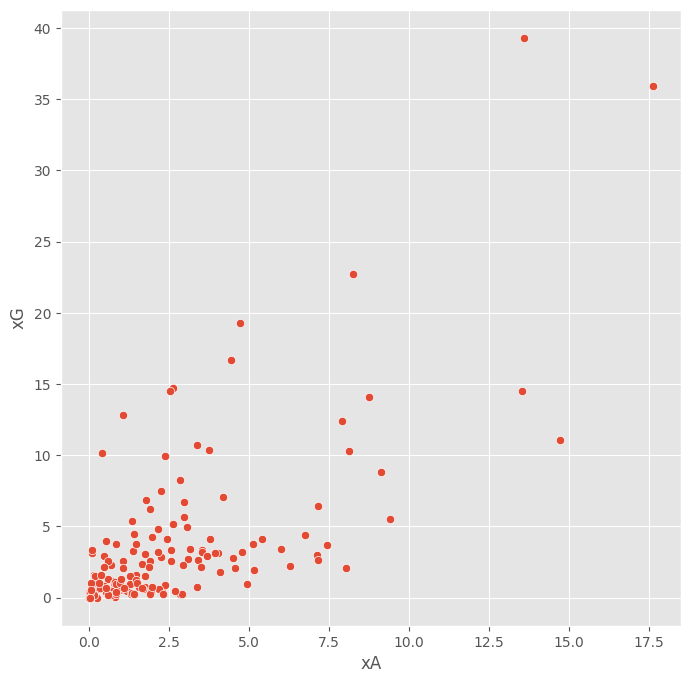

In [116]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x="xA",y="xG",data=df)

In [117]:
#Scaling the data

In [118]:
a=[-4, 0, 5, 6, 9]

In [119]:
a=np.array(a)

In [120]:
scaledMax=10
scaledMin=0

In [121]:
li=[]

In [122]:
for i in range(0,len(a)):
    li.append(((a[i]-np.min(a))/(np.max(a)-np.min(a)))*(scaledMax-scaledMin)+scaledMin)

In [123]:
li

[0.0, 3.076923076923077, 6.923076923076923, 7.6923076923076925, 10.0]

In [124]:
def scale(x):
    return(((x-df["xG"].min())/(df["xG"].max()-df["xG"].min()))*(scaledMax-scaledMin)+scaledMin)
    

df["Scaled_xG"]=df["xG"].apply(lambda x:scale(x))

In [125]:
def scale(x):
    return(((x-df["xA"].min())/(df["xA"].max()-df["xA"].min()))*(scaledMax-scaledMin)+scaledMin)
    

df["Scaled_xA"]=df["xA"].apply(lambda x:scale(x))

In [126]:
df["Sum_of_xg_xa"]=df["xG"]+df["xA"]

In [127]:
t5=df.sort_values(by=["Sum_of_xg_xa"],ascending=False)["player_name"].head(12).to_list()

In [128]:
sorted_df=df.sort_values(by=["Sum_of_xg_xa"],ascending=False)

In [129]:
sxG=sorted_df["Scaled_xG"].head(12).to_list()

In [130]:
sxA=sorted_df["Scaled_xA"].head(12).to_list()

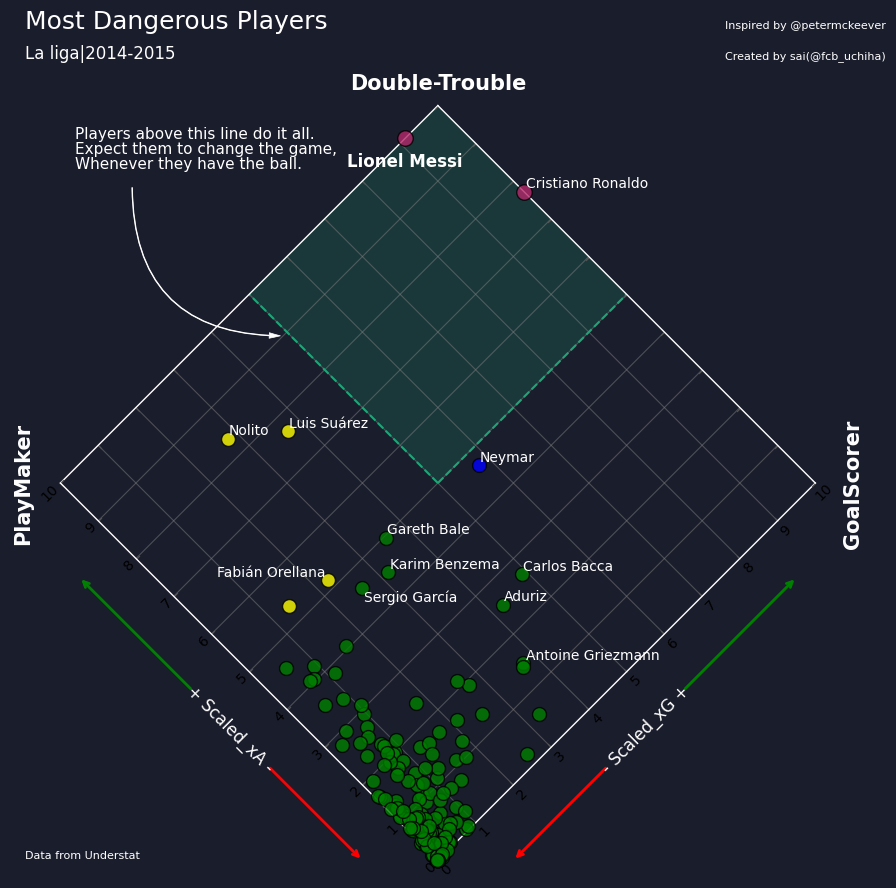

In [132]:
fig=plt.figure(figsize=(10,10))

plot_extents = 0, 10, 0, 10
fig.set_facecolor("#1A1D2C")
transform = Affine2D().rotate_deg(45)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents)
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
ax.patch.set_facecolor("#1A1D2C")
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.tick_params(axis='both', which='both', length=0)
fig.add_subplot(ax)
aux_ax = ax.get_aux_axes(transform)
helper.grid_finder.grid_locator1._nbins = 10
helper.grid_finder.grid_locator2._nbins = 10

plt.grid(alpha=0.5,color="grey")

for i in range(0,df.shape[0]):
    if df["Scaled_xG"].tolist()[i]>5 and df["Scaled_xA"].tolist()[i]>5:
        aux_ax.scatter(df["Scaled_xG"].tolist()[i],df["Scaled_xA"].tolist()[i],color="#B3286A",zorder=3,s=125,alpha=0.8,edgecolors="black", linewidths=1,)
    elif df["Scaled_xG"].tolist()[i]>5 and df["Scaled_xA"].tolist()[i]<5:
        aux_ax.scatter(df["Scaled_xG"].tolist()[i],df["Scaled_xA"].tolist()[i],color="blue",zorder=3,s=100,alpha=0.8,edgecolors="black", linewidths=1,)
    elif df["Scaled_xG"].tolist()[i]<5 and df["Scaled_xA"].tolist()[i]>5:
        aux_ax.scatter(df["Scaled_xG"].tolist()[i],df["Scaled_xA"].tolist()[i],color="yellow",zorder=3,s=100,alpha=0.8,edgecolors="black", linewidths=1,)
    else:
         aux_ax.scatter(df["Scaled_xG"].tolist()[i],df["Scaled_xA"].tolist()[i],color="green",zorder=3,s=100,alpha=0.8,edgecolors="black", linewidths=1)
texts = [aux_ax.text(sxG[i], sxA[i],t5[i], ha='center', va='center',color="white",zorder=4,) for i in range(1,len(t5))]
adjust_text(texts)
aux_ax.annotate(t5[0],xy=(sxG[0]-0.3, sxA[0]-0.3), xycoords='data',ha='center', va='center',color="white",zorder=4,fontweight="bold",fontsize=12)
aux_ax.plot([5,5,5,5,5,5],[5,6,7,8,9,10],"--",color="#1DA676",)
aux_ax.plot([5,6,7,8,9,10],[5,5,5,5,5,5],"--",color="#1DA676",)

aux_ax.annotate('', xy=(3.5,-1), xycoords='data', xytext=(1,-1), 
            arrowprops=dict(arrowstyle="<-", color='red',lw=2),transform=transform,ha='center', va='center')
aux_ax.annotate('- Scaled_xG +', xy=(2,-1), xycoords='data', xytext=(4.5,-1),transform=transform,color="white",rotation=45,fontsize=12,ha='center', va='center')
aux_ax.annotate('', xy=(8.5,-1), xycoords='data', xytext=(5.5,-1), 
            arrowprops=dict(arrowstyle="->", color='green',lw=2),transform=transform,ha='center', va='center')

aux_ax.annotate('', xy=(-1,3.5,), xycoords='data', xytext=(-1,1), 
            arrowprops=dict(arrowstyle="<-", color='red',lw=2),transform=transform,ha='center', va='center')
aux_ax.annotate('', xy=(-1,8.5), xycoords='data', xytext=(-1,5.5), 
            arrowprops=dict(arrowstyle="->", color='green',lw=2),transform=transform,ha='center', va='center')
aux_ax.annotate('+ Scaled_xA -', xy=(-1,2), xycoords='data', xytext=(-1,4.5),color="white",rotation=315,fontsize=12,ha='center', va='center')

rect3 = patches.Rectangle((5,5),5,5,facecolor='#1DA676',alpha=0.2,zorder=-1)
aux_ax.add_patch(rect3)


aux_ax.text(10.5,-0.5,"GoalScorer", ha='center', va='center',color="White",rotation=90,fontsize=15,fontweight="bold")
aux_ax.text(-0.5,10.5,"PlayMaker", ha='center', va='center',color="White",rotation=90,fontsize=15,fontweight="bold")
aux_ax.text(10.3,10.3,"Double-Trouble", ha='center', va='center',color="White",fontsize=15,fontweight="bold")

fig.text(0.1,0.95,"Most Dangerous Players",fontsize=18,color="white")
fig.text(0.1,0.92,"La liga|2014-2015",fontsize=12,color="white")
fig.text(0.8,0.95,"Inspired by @petermckeever",fontsize=8,color="white")
fig.text(0.8,0.92,"Created by sai(@fcb_uchiha)",fontsize=8,color="white")

style1 = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style1, color="white",)
a3 = patches.FancyArrowPatch( (4.9,13),(4.9,9),
                             connectionstyle="arc3,rad=.5", **kw)

aux_ax.add_patch(a3)
fig.text(0.15,0.84,"Players above this line do it all.",fontsize=11,color="white")
fig.text(0.15,0.825,"Expect them to change the game,",fontsize=11,color="white")
fig.text(0.15,0.81,"Whenever they have the ball.",fontsize=11,color="white")

fig.text(0.1,0.12,"Data from Understat",fontsize=8,color="white")


plt.savefig("hello.jpg",dpi=500,facecolor="#1A1D2C")
